In [20]:
import rasterio

In [24]:
dataset = rasterio.open('test.tif')

In [29]:
height = dataset.bounds.top - dataset.bounds.bottom
width = dataset.bounds.right - dataset.bounds.left
print(height)
print(f"Width: {width}")

411.3787536844611
Width: 196.9022576068528


In [34]:
# empty cleanup
import os
import numpy as np
i = 1
for file in os.listdir("tiles_test"):
    data = rasterio.open(os.path.join("tiles_test", file))
    if not np.any(data.read(1)):
        os.remove(os.path.join("tiles_test", file))
        print(f"Removed {file}, sum: {i}")
        i += 1

Removed tile_200-5700.tif, sum: 1
Removed tile_5700-1500.tif, sum: 2
Removed tile_0-4500.tif, sum: 3
Removed tile_0-12700.tif, sum: 4
Removed tile_5500-11500.tif, sum: 5
Removed tile_600-3200.tif, sum: 6
Removed tile_5800-1000.tif, sum: 7
Removed tile_5600-11100.tif, sum: 8
Removed tile_700-1500.tif, sum: 9
Removed tile_5300-1000.tif, sum: 10
Removed tile_4700-100.tif, sum: 11
Removed tile_6200-12600.tif, sum: 12
Removed tile_5400-11900.tif, sum: 13
Removed tile_0-2300.tif, sum: 14
Removed tile_5200-2000.tif, sum: 15
Removed tile_600-1000.tif, sum: 16
Removed tile_6100-4500.tif, sum: 17
Removed tile_0-4200.tif, sum: 18
Removed tile_5800-11000.tif, sum: 19
Removed tile_5500-900.tif, sum: 20
Removed tile_6400-12700.tif, sum: 21
Removed tile_5000-2000.tif, sum: 22
Removed tile_5300-13400.tif, sum: 23
Removed tile_300-5200.tif, sum: 24
Removed tile_3500-13400.tif, sum: 25
Removed tile_800-1400.tif, sum: 26
Removed tile_5800-7300.tif, sum: 27
Removed tile_6400-9300.tif, sum: 28
Removed tile

In [42]:
import random
# create test

test_dataset = []
for _ in range(100):
    sample = random.choice(os.listdir("tiles_test"))
    test_dataset.append(sample)

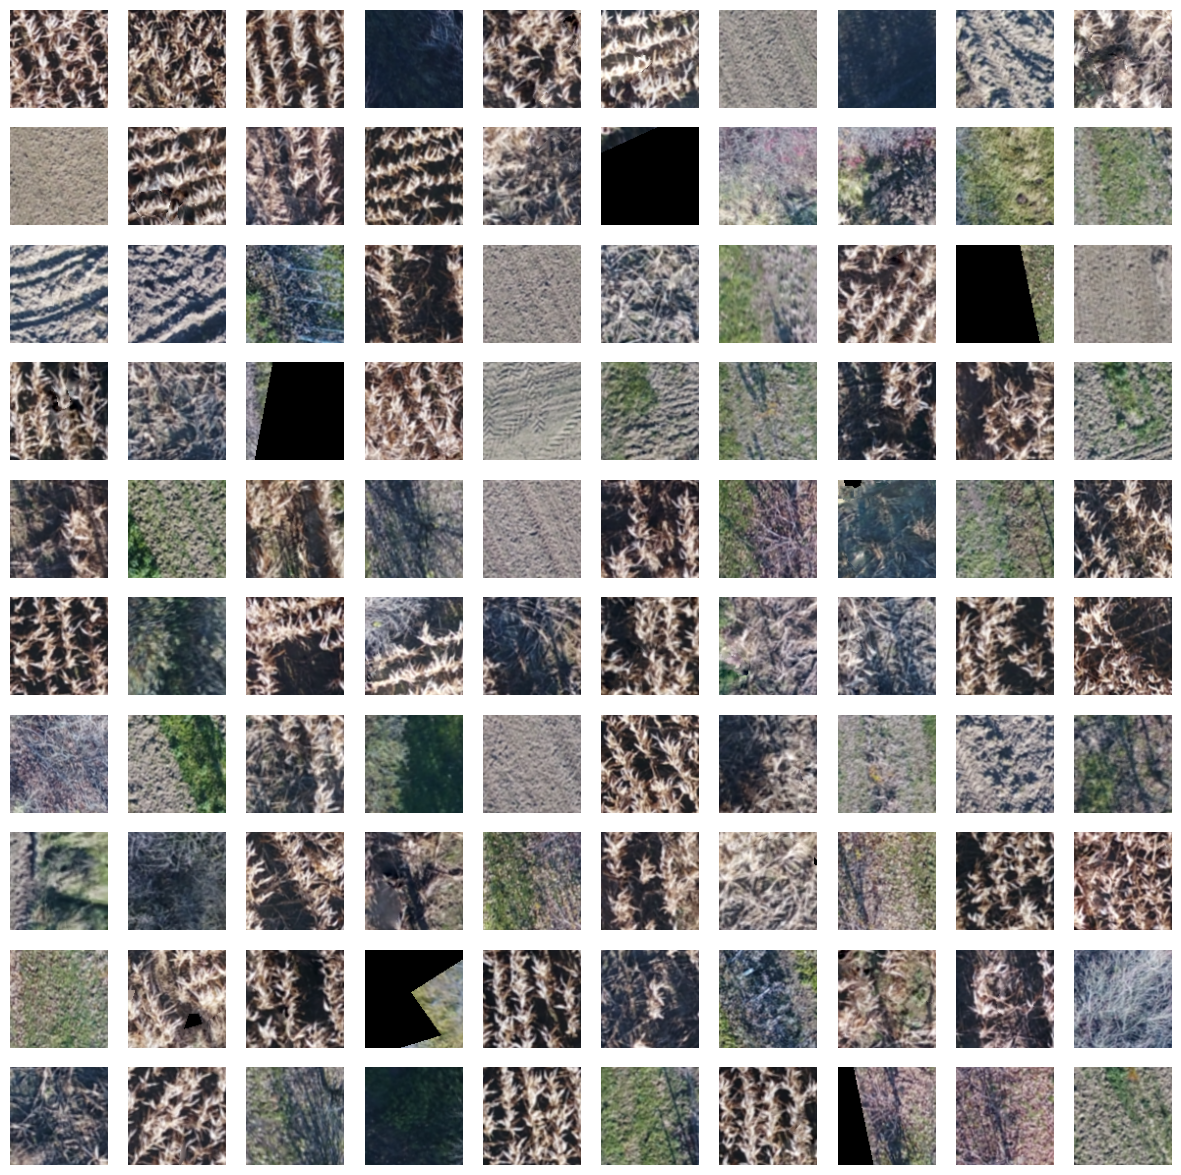

In [53]:
import matplotlib.pyplot as plt
from rasterio.plot import show
plt.figure(figsize=(15, 15))
for idx,val in enumerate(test_dataset):
    plt.subplot(10,10,idx+1)
    img = rasterio.open(os.path.join("tiles_test", val))
    stack = np.dstack((img.read(1), img.read(2), img.read(3)))
    plt.axis('off')
    plt.imshow(stack)


In [ ]:
# tylko że tego jest 6k 
# ale jak zrobię 100 olabelowanych to wystarczy?
# ale jak to olabelować?
# KUKU - NO KUKU
# no to jest 
# ale jak to się technicznie labeluje? mam sobie

# K


In [55]:
import shutil

for x in test_dataset:
    shutil.copy(os.path.join("tiles_test", x), os.path.join("class", x))

In [77]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.__version__

'2.12.0'

In [71]:
import splitfolders

input_dir = "data"
output = "splited"

splitfolders.ratio("data", output="splited",
                   seed=42, ratio=(.7, .15, .15),
                   group_prefix=None)

Copying files: 6055 files [00:00, 6808.27 files/s]
